In [10]:
%load_ext autoreload
%autoreload 2

from diffusers import ControlNetModel
from text3d2video.cross_frame_attn import CrossFrameAttnProcessor
from text3d2video.pipelines.my_controlnet import MyControlNetPipeline
from text3d2video.pipelines.my_pipeline import  MyPipeline
import torch
import text3d2video.wandb_util as wu

dtype = torch.float16
sd_repo = "runwayml/stable-diffusion-v1-5"
controlnet_repo = "lllyasviel/sd-controlnet-depth"
device = torch.device('cuda')

controlnet = ControlNetModel.from_pretrained(
    controlnet_repo,
    torch_dtype=torch.float16
).to(device)

pipe = MyControlNetPipeline.from_pretrained(
    sd_repo,
    controlnet=controlnet,
    torch_dtype=dtype
).to(device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading pipeline components...:  20%|██        | 1/5 [00:00<00:02,  1.87it/s]/home/jorge/miniconda3/envs/thesis/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Loading pipeline components...: 100%|██████████| 5/5 [00:00<00:00,  5.15it/s]


In [24]:
from text3d2video.artifacts.animation_artifact import AnimationArtifact
from text3d2video.rendering import render_depth_map
from text3d2video.util import front_camera

animation_tag = 'rumba:latest'

animation = wu.get_artifact(animation_tag)
animation = AnimationArtifact.from_wandb_artifact(animation)

camera = front_camera()
frames = animation.load_ordered_frames_sample(4)
depth_maps = render_depth_map(frames, camera)

wandb: Downloading large artifact rumba:latest, 121.09MB. 61 files... 
wandb:   61 of 61 files downloaded.  
Done. 0:0:0.4
/home/jorge/miniconda3/envs/thesis/lib/python3.8/site-packages/pytorch3d/io/obj_io.py:546: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")


100%|██████████| 31/31 [00:05<00:00,  5.97it/s]


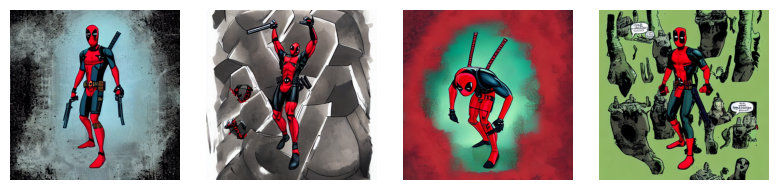

In [25]:
from text3d2video.ipython_utils import display_ims

prompt = "deadpool"

images = pipe([prompt] * len(depth_maps), depth_maps)
display_ims(images, scale=2)